In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv("ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


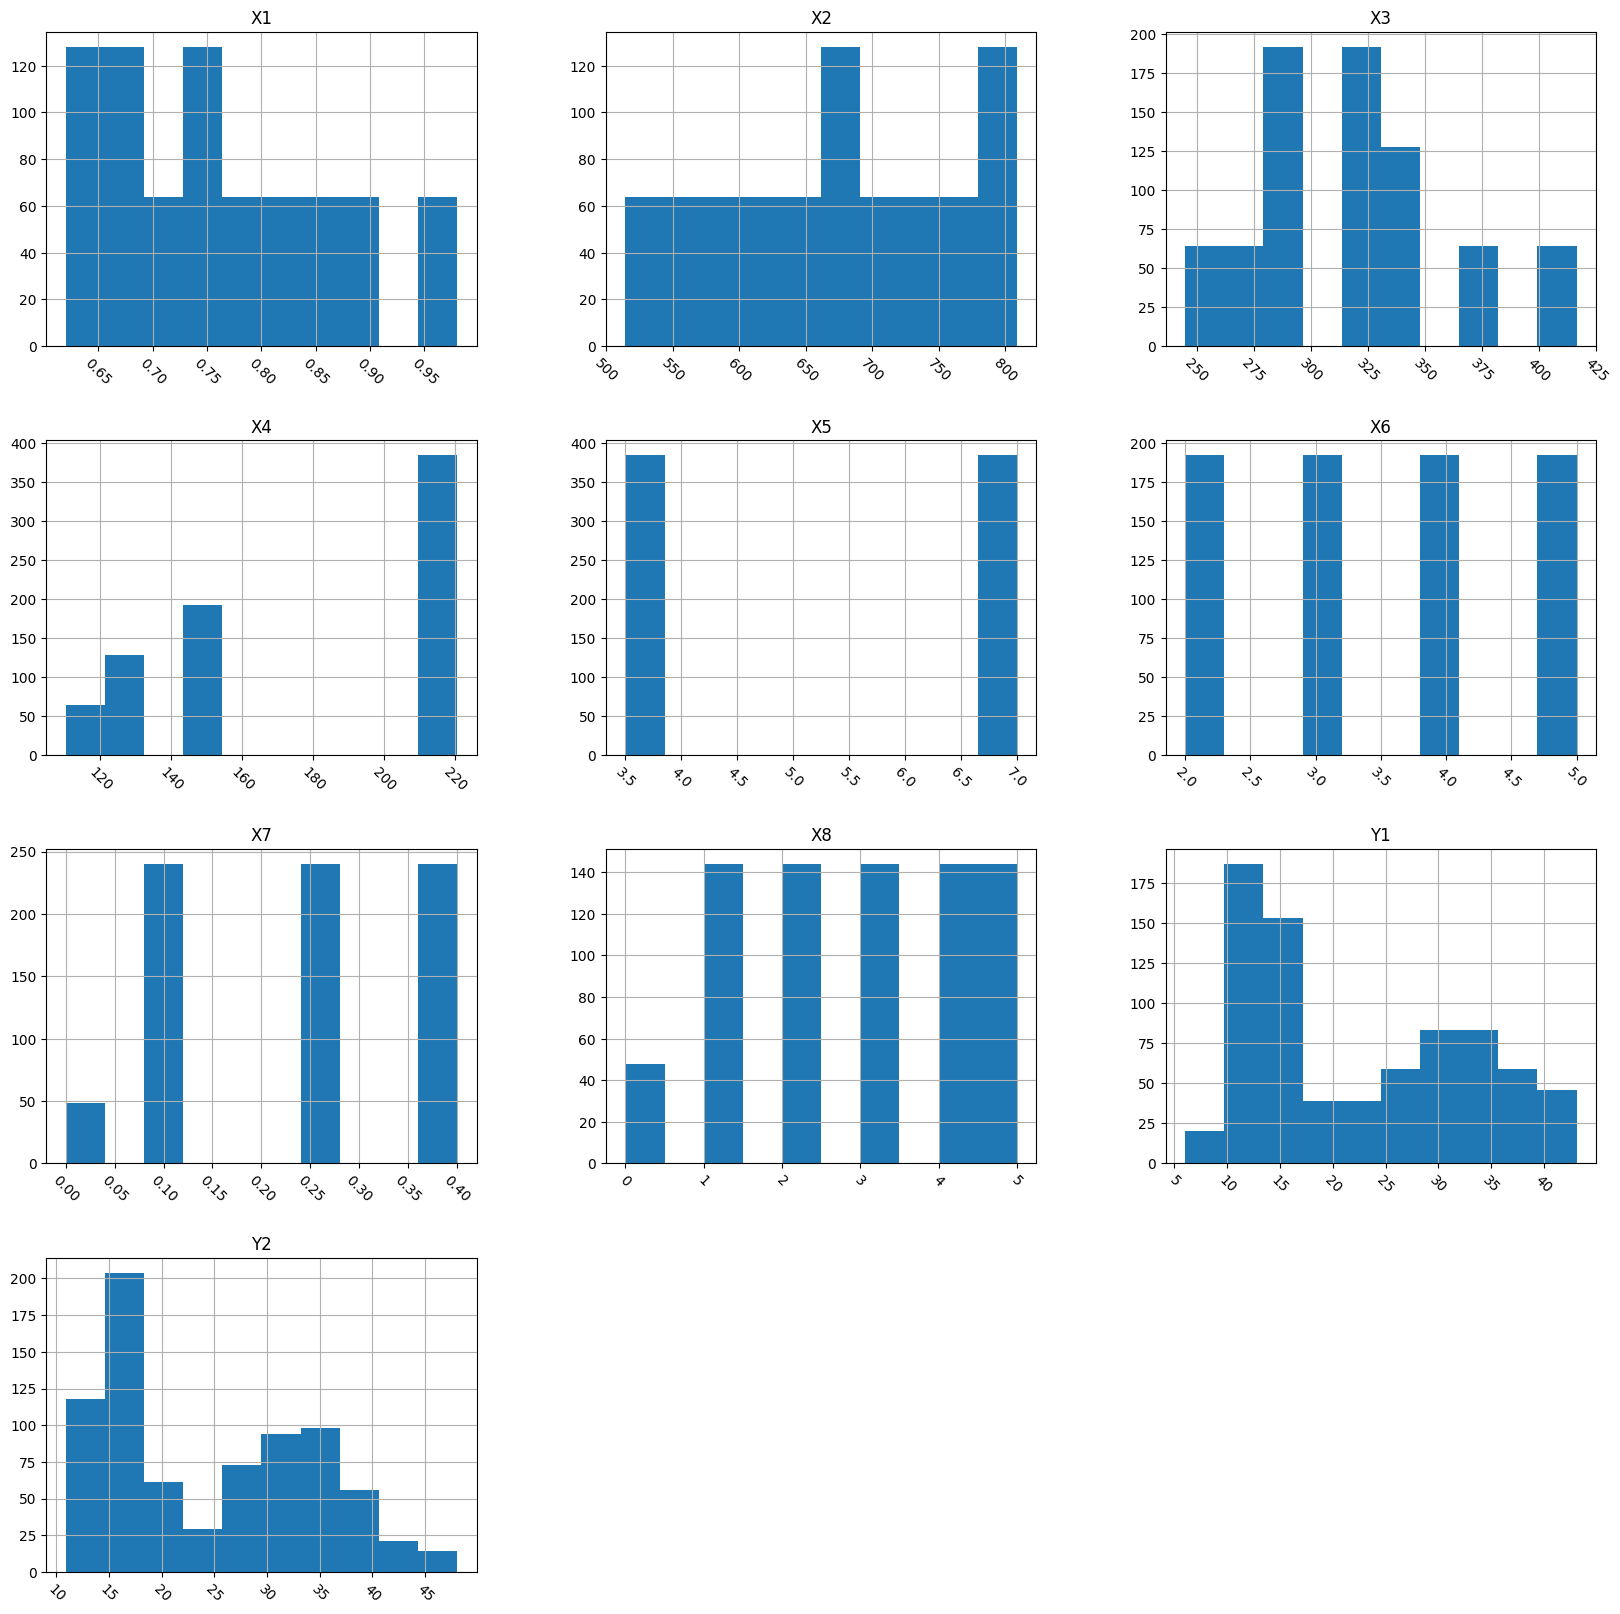

In [7]:
df.hist(figsize=(20, 20), xrot=-45)
plt.show()

In [21]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)

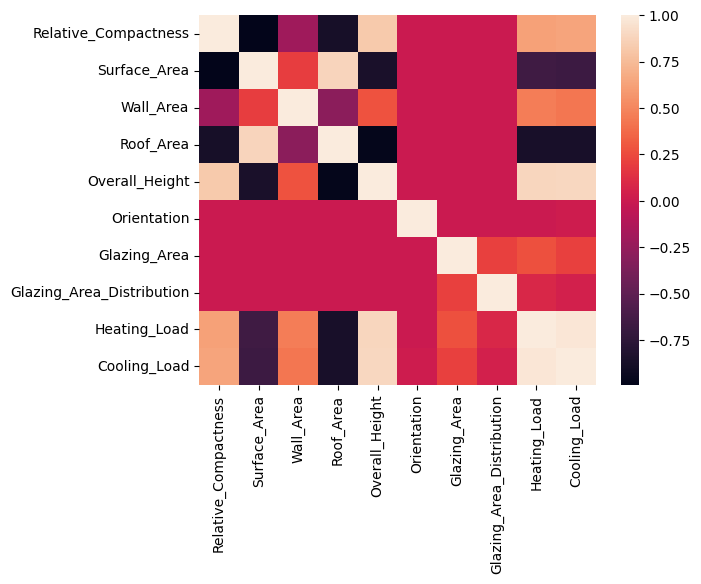

In [23]:
corr = df.corr()
x = sns.heatmap(corr)

In [28]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

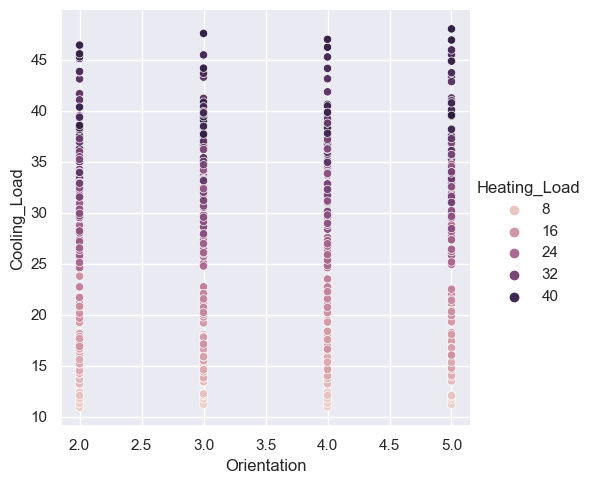

In [41]:
sns.set()
sns.relplot(x='Orientation', y='Cooling_Load', data=df, kind='scatter', hue='Heating_Load')

In [42]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [54]:
df[df['Heating_Load']==15.55]

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33


In [55]:
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

<AxesSubplot: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

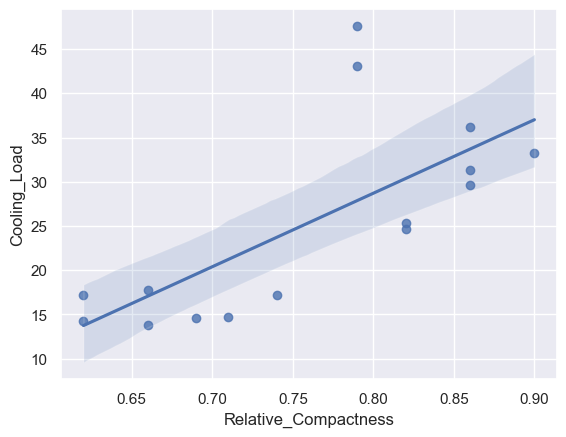

In [56]:
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

Mean Absolute Error

In [57]:
#Normalize Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [58]:

#Extract Features and Labels
features_df = norm_df.drop(columns=['Heating_Load', 'Cooling_Load'])
label = norm_df['Heating_Load']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, label, test_size=0.1)

In [60]:
# train
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [61]:
# predict and evaluate
pred = linear_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)

In [64]:
round(mae, 3)

0.057

Residual Sum of Squares(RSS) or Mean Squared Error(MSE)

In [65]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)

In [67]:
rmse = np.sqrt(mse)
round(rmse, 3)

0.081

R-Squared

In [69]:
from sklearn.metrics import r2_score
val = r2_score(y_test, pred)
val

0.9107410166009536

L1 or Lasso Regression

Regularization that shrinks coefficients to zero, thereby performing feature extraction

In [74]:
from sklearn.linear_model import Lasso
ls = [0.00001,0.0001, 0.001, 0.01, 0.1, 1]
for item in ls:
    lasso_reg = Lasso(alpha = item)
    lasso_reg.fit(x_train, y_train)
    predict = lasso_reg.predict(x_test)
    print(f"For alpha = {item}, mse = {mean_squared_error(y_test, predict)}")

For alpha = 1e-05, mse = 0.006600944402548983
For alpha = 0.0001, mse = 0.006660743632252329
For alpha = 0.001, mse = 0.007393227033138399
For alpha = 0.01, mse = 0.010604434516244269
For alpha = 0.1, mse = 0.05590365210327435
For alpha = 1, mse = 0.07426274237230723


In [75]:
lasso_reg = Lasso(alpha = 0.0001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0001)

L2 or Ridge Regression

Regularization that reduces coefficient close to zero but not zero

In [76]:
from sklearn.linear_model import Ridge
ls = [0.00001,0.0001, 0.001, 0.01, 0.1, 1]
for item in ls:
    ridge_reg = Ridge(alpha = item)
    ridge_reg.fit(x_train, y_train)
    predict = ridge_reg.predict(x_test)
    print(f"For alpha = {item}, mse = {mean_squared_error(y_test, predict)}")

For alpha = 1e-05, mse = 0.006599198826760494
For alpha = 0.0001, mse = 0.006599215162415789
For alpha = 0.001, mse = 0.006599380561153579
For alpha = 0.01, mse = 0.006601226668030279
For alpha = 0.1, mse = 0.006630795759140815
For alpha = 1, mse = 0.006922672734563203


In [77]:
ridge_reg = Ridge(alpha = 0.0001)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.0001)

Elastic Net Regression

combination of L1 and L2

In [78]:
from sklearn.linear_model import ElasticNet
eln = ElasticNet(alpha=0.001)
eln.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [83]:
mean_absolute_error(y_test, eln.predict(x_test))

0.05894231250427459

To compare the weights of the diffferent models

In [79]:
def get_weights_df(model, feat, col_name):
    """Returns the weight of every feature

    Args:
        model (_type_): _description_
        feat (_type_): _description_
        col_name (_type_): _description_
    """
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    return weights_df

In [81]:
linear_model_weights = get_weights_df(eln, x_train, 'ElasticCV_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


In [82]:
final_weights

,Features,ElasticCV_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.050832,-0.619890,-0.413795
1,Surface_Area,0.000000,-0.247000,-0.000000
2,Roof_Area,-0.000000,-0.348881,-0.332532
3,Orientation,-0.000000,-0.001245,-0.000933
4,Glazing_Area_Distribution,0.021864,0.026157,0.025277
5,Wall_Area,0.199759,0.025133,0.000000
6,Glazing_Area,0.211854,0.216603,0.215852
7,Overall_Height,0.478826,0.378282,0.421366
